## Questions to be answered
Let’s assume that the aim of the project is to answer the questions:
“At what point in the COVID-19 pandemic should a country close schools?”
“At what point should a country re-open schools?”
“How long might schools be closed for?”

In [2]:
#import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import data
#google_sheet_url = "https://docs.google
# .com/spreadsheets/d/1ndHgP53atJ5JEtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0"
#url = google_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv('/Users/kylin/PycharmProjects/pbl4-XinyaoQian1/data/CGD.csv', skiprows=1)
df.head()

,Country,Code,Region,Income Group,School Closures,As of,Date,Number of confirmed cases at time of closure,Planned Reopening,Planned Length of Closure (Weeks),...,Other supports - Childcare,Other supports - Childcare (Detail),Other supports - Meals,Other supports - Meals (Details),Other supports - Other,Source,Source.1,Facebook Page,Official COVID Education Policy Document,Source for Re-opening
0,Afghanistan,AFG,South Asia,Low income,Yes,NaN,17 March,22,1 month,4,...,NaN,NaN,NaN,NaN,NaN,https://www-washingtonpost-com.ezp-prod1.hul.h...,https://moe.gov.af/index.php/en/all-news\n\nht...,https://www.facebook.com/MoEAfghanistan/?hc_re...,https://planipolis.iiep.unesco.org/sites/plani...,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,NaN,9 March,2,2 weeks,2,...,NaN,NaN,Self-employed families receive cash benefit,NaN,NaN,https://balkaninsight.com/2020/03/09/albania-c...,NaN,https://www.facebook.com/arsimitsportitdherinise/,NaN,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,NaN,12 March,24,5 April,3,...,NaN,NaN,NaN,NaN,NaN,https://www.africanews.com/2020/03/16/coronavi...,http://www.education.gov.dz/,https://www.facebook.com/EducationAlgerie/,NaN,NaN
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,Yes,NaN,23 March,NaN,30 days,4,...,NaN,NaN,NaN,NaN,NaN,https://www.doe.as/\n\nhttps://www.doe.as/file...,https://www.doe.as/files/user/2/file/2020-AMEN...,https://www.facebook.com/americansamoagov.gov/,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income,Yes,NaN,13 March,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.leparisien.fr/societe/coronavirus-l...,NaN,NaN,NaN,NaN


In [4]:
# The next two lines set pandas options so all of the columns and rows will
# be printed in the output, this is useful
# for teaching but you wouldn't necessarily need it for your coursework
pd.set_option('display.max_rows', df.shape[0] + 1)
pd.set_option('display.expand_frame_repr', False)
# Print column names
print("Initial columns")
print(df.columns)

Initial columns
Index(['Country', 'Code', 'Region', 'Income Group', 'School Closures', 'As of',
       'Date', 'Number of confirmed cases at time of closure',
       'Planned Reopening', 'Planned Length of Closure (Weeks)',
       'Closure extended?', 'Planned re-opening 2', 'Details of closure',
       'Reopening process started\n(Y/N/School year ended/Never closed)',
       'Date reopening process started', 'Number of cases at re-opening',
       'Total Weeks closed', 'Details of re-opening', 'Remote/online tuition?',
       'Any distance learning?', 'Online', 'Radio', 'TV',
       'Sending work home with students / providing hardcopies of materials',
       'Distance curriculum available in multiple languages?',
       'Details of language of materials', 'Parent guide?',
       'Details of parent guidance', 'Education Emergency Plan?',
       'National exams impacted? (Y/N)', 'National exams impacted? (Detail)',
       'National exams impact (went ahead/ cancelled/postponed/ Planned

In [5]:
# Replace the dataframe with just the columns we want to keep
selected_cols = df[['Country',
                    'Code',
                    'Region',
                    'Income Group',
                    'School Closures',
                    'Date',
                    'Number of confirmed cases at time of closure',
                    'Reopening process started\n(Y/N/School year ended/Never closed)',
                    'Date reopening process started',
                    'Number of cases at re-opening']]
df = selected_cols.copy()
print("Selected columns")
print(df.columns)

Selected columns
Index(['Country', 'Code', 'Region', 'Income Group', 'School Closures', 'Date',
       'Number of confirmed cases at time of closure',
       'Reopening process started\n(Y/N/School year ended/Never closed)',
       'Date reopening process started', 'Number of cases at re-opening'],
      dtype='object')


In [6]:
# Rename the longer column names
df.rename(columns={
    'Number of confirmed cases at time of closure': 'Cases at close',
    'Date reopening process started': 'Open date',
    'Number of cases at re-opening': 'Cases at open',
    'Date': 'Close date',
    'Reopening process started\n(Y/N/School year ended/Never closed)': 'Reopen status'
}, inplace=True)

In [7]:
# Check for missing values
print(df.isna().any())

Country            True
Code               True
Region             True
Income Group       True
School Closures    True
Close date         True
Cases at close     True
Reopen status      True
Open date          True
Cases at open      True
dtype: bool


In [8]:
# Drop all rows after Zimbabwe (these rows no Country name so keep just the
# rows that are not na)
df = df[df['Country'].notna()]
print(df.isna().any())
# as we can see, in this case, no N/A in 'country'

Country            False
Code               False
Region             False
Income Group       False
School Closures    False
Close date          True
Cases at close      True
Reopen status      False
Open date           True
Cases at open       True
dtype: bool


In [9]:
# Drop all rows where the Reopen status is 'Never closed'
# This solution uses the reverse, keeping the rows where the condition isn't true
df = df[df['Reopen status'] != 'Never closed']
# Keep where the cases at close, close date or open date are not null
df = df[df['Cases at close'].notnull()]
df = df[df['Close date'].notnull()]
df = df[df['Open date'].notnull()]
print(df.isna().any())

Country            False
Code               False
Region             False
Income Group       False
School Closures    False
Close date         False
Cases at close     False
Reopen status      False
Open date          False
Cases at open       True
dtype: bool


### Add a new column to calculate the number of days schools were closed
#### There are a few issues:
 1. The Close date column does not contain the year!
 2. Neither Open date or Close date are date format
 An option may be to read these from the initial CSV as dates using the
 argument

In [10]:
# parse_dates=['Date','Date reopening process started']

df['Close date'].head()
# as we can see, there is no year

0    17 March
1     9 March
2    12 March
4    13 March
5    24 March
Name: Close date, dtype: object

In [11]:
# This solution adds ' 2020' and converts the Close date to a date time data type
df['Close date'] = df['Close date'].astype(str) + ' 2020'
df['Close date'].head()
df['Close date'].dtypes

dtype('O')

'b'       boolean
'i'       (signed) integer
'u'       unsigned integer
'f'       floating-point
'c'       complex-floating point
'O'       (Python) objects
'S', 'a'  (byte-)string
'U'       Unicode
'V'       raw data (void)


In [12]:
df['Close date'] = pd.to_datetime(df['Close date'])


In [13]:
df['Close date'].dtypes


dtype('<M8[ns]')

dtype('<M8[ns]') means the datatype is now a datetime


In [14]:
# Convert the Open date column to date
df['Open date'] = pd.to_datetime(df['Open date'])
# Add a new column based on calculating the number of days closed
# Note: `dt.days` ensures the value is stored as a number e.g. 21 rather than
# 21 days - if you omit .dt.days and print
# the column you should see the difference
df['Closure duration'] = (df['Open date'] - df['Close date'])
print(df['Closure duration'].head())

0   158 days
1   175 days
2   223 days
4    81 days
5   195 days
Name: Closure duration, dtype: timedelta64[ns]


In [15]:
df['Closure duration'] = (df['Open date'] - df['Close date']).dt.days
print(df['Closure duration'].head())

0    158
1    175
2    223
4     81
5    195
Name: Closure duration, dtype: int64


Check the data types are appropriate



In [16]:
# Print the column names and data types
print(df.info(verbose=True))
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 217
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           194 non-null    object        
 1   Code              194 non-null    object        
 2   Region            194 non-null    object        
 3   Income Group      194 non-null    object        
 4   School Closures   194 non-null    object        
 5   Close date        194 non-null    datetime64[ns]
 6   Cases at close    194 non-null    object        
 7   Reopen status     194 non-null    object        
 8   Open date         194 non-null    datetime64[ns]
 9   Cases at open     193 non-null    object        
 10  Closure duration  194 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 18.2+ KB
None


,Country,Code,Region,Income Group,School Closures,Close date,Cases at close,Reopen status,Open date,Cases at open,Closure duration
0,Afghanistan,AFG,South Asia,Low income,Yes,2020-03-17,22,Yes,2020-08-22,37953,158
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,2020-03-09,2,Yes,2020-08-31,9380,175
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,2020-03-12,24,Yes,2020-10-21,54839,223
4,Andorra,AND,Europe & Central Asia,High income,Yes,2020-03-13,2,Yes,2020-06-02,844,81
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,Yes,2020-03-24,0,Yes,2020-10-05,5370,195
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,Yes,2020-03-19,1,Yes,2020-09-07,95,172
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,Yes,2020-03-15,56,Yes,2020-10-13,894206,212
8,Armenia,ARM,Europe & Central Asia,Upper middle income,Yes,2020-03-16,45,Yes,2020-09-15,46119,183
9,Aruba,ABW,Latin America & Caribbean,High income,Yes,2020-03-16,2,Yes,2020-05-18,101,63
10,Australia,AUS,East Asia & Pacific,High income,Partial,2020-03-25,"2,364",Yes,2020-05-25,7100,61


In [17]:
# Change the data type of Cases at close and Cases at open to numeric

df['Cases at close'] = df['Cases at close'].str.replace(',', '')
df['Cases at close'] = pd.to_numeric(df['Cases at close'])
df['Cases at open'] = df['Cases at open'].str.replace(',', '')
df['Cases at open'] = pd.to_numeric(df['Cases at open'])
df.head(10)

,Country,Code,Region,Income Group,School Closures,Close date,Cases at close,Reopen status,Open date,Cases at open,Closure duration
0,Afghanistan,AFG,South Asia,Low income,Yes,2020-03-17,22,Yes,2020-08-22,37953.0,158
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,2020-03-09,2,Yes,2020-08-31,9380.0,175
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,2020-03-12,24,Yes,2020-10-21,54839.0,223
4,Andorra,AND,Europe & Central Asia,High income,Yes,2020-03-13,2,Yes,2020-06-02,844.0,81
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,Yes,2020-03-24,0,Yes,2020-10-05,5370.0,195
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,Yes,2020-03-19,1,Yes,2020-09-07,95.0,172
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,Yes,2020-03-15,56,Yes,2020-10-13,894206.0,212
8,Armenia,ARM,Europe & Central Asia,Upper middle income,Yes,2020-03-16,45,Yes,2020-09-15,46119.0,183
9,Aruba,ABW,Latin America & Caribbean,High income,Yes,2020-03-16,2,Yes,2020-05-18,101.0,63
10,Australia,AUS,East Asia & Pacific,High income,Partial,2020-03-25,2364,Yes,2020-05-25,7100.0,61


In [18]:
print(df.info(verbose=True))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 217
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           194 non-null    object        
 1   Code              194 non-null    object        
 2   Region            194 non-null    object        
 3   Income Group      194 non-null    object        
 4   School Closures   194 non-null    object        
 5   Close date        194 non-null    datetime64[ns]
 6   Cases at close    194 non-null    int64         
 7   Reopen status     194 non-null    object        
 8   Open date         194 non-null    datetime64[ns]
 9   Cases at open     193 non-null    float64       
 10  Closure duration  194 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 18.2+ KB
None


 ### basic stats
 Try adding and running:
 'print(df.describe(datetime_is_numeric=True))'
The argument datetime_is_numeric=True
treats dates as a numeric value, otherwise the default behaviour for
describe is to return stats only for numeric columns.

In [20]:
print(df.describe(datetime_is_numeric=True))

                          Close date  Cases at close                      Open date  Cases at open  Closure duration
count                            194      194.000000                            194   1.930000e+02        194.000000
mean   2020-03-15 23:45:09.278350592      546.252577  2020-08-05 00:14:50.721649408   1.145614e+05        142.020619
min              2020-02-12 00:00:00        0.000000            2020-04-06 00:00:00   0.000000e+00         18.000000
25%              2020-03-13 00:00:00        1.000000            2020-05-25 00:00:00   5.090000e+02         73.000000
50%              2020-03-16 00:00:00        6.000000            2020-08-06 12:00:00   5.342000e+03        140.000000
75%              2020-03-19 00:00:00       38.500000            2020-09-15 00:00:00   4.278800e+04        186.000000
max              2020-04-14 00:00:00    70548.000000            2021-10-03 00:00:00   5.487540e+06        581.000000
std                              NaN     5090.724624            

 ## outlier
 An outlier is a data point that is significantly different from other data points in a data set
 Identifying outliers
Identifying outliers is subjective and techniques include:
Plot the data (e.g. histogram, scatter plot, boxplot)
Use common sense
Use statistical tests
Since this course doesn’t expect any knowledge or, nor teach any, statistics then we will check for outliers by creating
a chart, or plot, instead. In this instance let’s create a boxplot. The boxplot will be created using pandas dataframe
and displayed using the matplotlib library. We are using matplotlib for the backend charting but will not
otherwise be learning to use this library.
For this example we are just checking the ‘Cases at close’ column though you could use the same principle for other
columns.

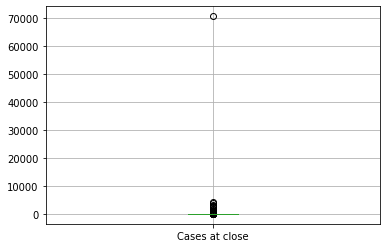

In [21]:
# Add to the end of your code
boxplot = df.boxplot(column=['Cases at close'])
boxplot.plot()
plt.show()